# Introduction to pandas

*I'd like to thank Nick Ross who graciously allowed me to derive pieces of this notebook and others from his amazing SQL/pandas course notes.*

Pandas is kind of like a table in the database or a spreadsheet that we can manipulate programmatically in Python. Pandas has two primary entities that you must be careful to distinguish to avoid getting confused:

* `DataFrame` is 2D tabular data structure; it has both rows and columns
* `Series` is a 1D array (colume) data structure

While a series looks like  a column from a data frame, they are really separate kinds of objects with different sets of functions that you can apply to them.  It is so important to distinguish between them that I tend to prefix the name of all data frame objects with `df_`, such as `df_salesinfo`.

Pandas lets you do a lot of querying, merging, and aggregation just like a database, but these data frames only exist in memory. That means:

* you can only operate on data that fits in memory
* data frames you construct disappear when you're Python program terminates, as opposed to the persistent disk
* pandas is not suitable for use on problems requiring multiple computers

Pandas data frames will be your primary data structure until machine learning, when we discuss building more complicated data structures such as decision trees.

## The first steps of EDA

While we go through this material, keep in mind that there is a basic process you can follow when confronted with a new data set. I always start out the following way:

1.  How many rows are there?
1.   What are the column names and column datatypes?
1.  Look at the data to see if the assigned/current column datatypes makes sense
1.  Identify categorical columns, nominal and ordinal
1.   Compute basic point statistics for numerical columns, such as min/max/mean/median
1.   Visualize some or all of the numerical columns to examine their distributions
1.  Which columns have missing values? Watch out for sentinel values that are physically present, but indicate missing values (e.g., 0, -1, -999, 'none or unspecified', '')

## How to start using pandas

First, we have to tell Python that we want to use pandas. I also tell it to import numpy, because I often want to use both of these libraries in conjunction with each other:

In [1]:
import numpy as np
import pandas as pd

Let's load the cars data again from the `data` subdirectory under this `notebooks` directory (since we are already familiar with).  You can [download this file](https://raw.githubusercontent.com/parrt/msds593/master/notebooks/data/cars.csv) onto your own computer wherever you want, but make sure that you specify the appropriate file name when loading it with pandas.

In [2]:
# what is my current working directory? use "pwd": "print working directory"
!pwd        # Anything after ! char is sent to Terminal for execution

/Users/parrt/github/msds593/notebooks


In [3]:
!ls -l data # list information about files in the data subdirectory

total 365392
-rw-r--r--@ 1 parrt  staff  116403970 Jan 24  2013 Train.csv
-rw-r--r--@ 1 parrt  staff       5996 Aug 15 11:49 cars.csv
-rw-r--r--@ 1 parrt  staff      16557 Aug 25 14:59 happy-2015.csv
-rw-r--r--@ 1 parrt  staff      17132 Aug 25 14:59 happy-2016.csv
-rw-r--r--+ 1 parrt  staff      21963 Aug 15 15:35 kaggle-uber-other-federal.csv
-rw-r--r--@ 1 parrt  staff      35959 Aug 15 10:32 organdonation.csv
-rw-r--r--@ 1 parrt  staff   70562621 Nov  1  2016 train.json


In a spreadsheet, the start of the `cars.csv` file looks like:

<img src="images/excel.png" width="250">

In [4]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


###  Exercise 0

Just so that you have your notebook set up for today's lab, make sure you can load the CSV file as shown above.

## Element data types

You can learn more about all of the [pandas data types](https://numpy.org/doc/stable/user/basics.types.html), but the key idea is that we must distinguish between integers, floating-point values (reals), boolean, strings, and datetime.

|Description| Python | Pandas|
| ----------- | --------- | ---- |
|Integers| `int`|`int64`|
|Text| `str`| `object`|
|Double/Float| `float`|`float64` |
|Boolean (T/F)| `bool`| `bool`|
|Date/Time| `datetime` | `datetime64`|
|Categorical| n/a | `category` (held internally as an integer)|

The reason that we emphasize knowing types is that these objects behave differently and respond to a different set of functions, which we'll see shortly.

Let me drive home this point about types and values.  All entities in Python have both a value and associated type; everything is just bits in the computer and so Python needs to know how to interpret the bits as a string or number or date. The Python literal `34` has value 34 and type `int`.  The Python literal `'hi'` has value *hi* and type `str`.

In [5]:
a = 34
b = 'hi'
type(a), type(b), a.__class__, b.__class__, a.__class__.__name__, b.__class__.__name__

(int, str, int, str, 'int', 'str')

Here are some more complicated types:

In [6]:
type([1,2,3]), type(np.array([1,2,3]))

(list, numpy.ndarray)

In [7]:
type(df_cars), type(df_cars['MPG'])  # `[..]` indexing a data frame returns a column (as a series object)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [8]:
type(3.14159), df_cars['MPG'].dtype # what is data type of a float and the MPG column?

(float, dtype('float64'))

You can think of `float` and  pandas' `float64` as the same thing, but they are technically distinct types in the Python runtime environment; they could behave differently, depending on the operation you perform.

### Reading in nonnumeric data

Next, let's look at some public domain data from [Kaggle's Uber Pickups in New York City competition](https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city). (The license says public domain so it should be okay to host the 100 rows in this repository for educational purposes.)  The goal is to look at date-related, string, and [categorical data types](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html).

In [9]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv")
df_uber.head(3)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned


In [10]:
df_uber.info() # everything looks like a string (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             99 non-null     object
 1   Time             99 non-null     object
 2   PU_Address       99 non-null     object
 3   DO_Address       98 non-null     object
 4   Routing Details  99 non-null     object
 5   PU_Address.1     99 non-null     object
 6   Status           99 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


Ooops.  It read everything in as a string (`object`). Let's try this again being more specific using a dictionary to specify the type of `Status` and tell it to parse two of the columns as date related types:

In [11]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv",
                      parse_dates=['Date','Time'],
                      dtype={'Status':'category'})
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             99 non-null     datetime64[ns]
 1   Time             99 non-null     datetime64[ns]
 2   PU_Address       99 non-null     object        
 3   DO_Address       98 non-null     object        
 4   Routing Details  99 non-null     object        
 5   PU_Address.1     99 non-null     object        
 6   Status           99 non-null     category      
dtypes: category(1), datetime64[ns](2), object(4)
memory usage: 5.0+ KB


In [137]:
df_uber.head(2)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,2020-09-10 07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,2020-09-10 07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived


Ooops. That `Time` column got today's date added on. Convert to just time info:

In [142]:
df_uber['Time'] = df_uber['Time'].dt.time
df_uber.head(2)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived


### Exercise 1

1. Make sure that you can load the `kaggle-uber-other-federal.csv` data into a data frame  with the specified column type overrides for dates and categorical `Status`.
1. Display the `Date` column
1. Display the `Status` column

## Getting an initial sniff of the data

The first step in EDA (of course, after you've decided what problem you're trying to solve) is to get a basic idea of what the data looks like. We've already seen how to get all of the data types:

In [13]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     392 non-null    float64
 1   CYL     392 non-null    int64  
 2   ENG     392 non-null    float64
 3   WGT     392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.4 KB


We also want to know the names of the columns which is provided by `info()` but we can ask for it explicitly, which is useful because we sometimes want to operate on the column names:

In [14]:
df_cars.columns, type(df_cars.columns) # gets a pandas `Index` object

(Index(['MPG', 'CYL', 'ENG', 'WGT'], dtype='object'),
 pandas.core.indexes.base.Index)

In [15]:
df_cars.columns.values, type(df_cars.columns.values) # gets a numpy version

(array(['MPG', 'CYL', 'ENG', 'WGT'], dtype=object), numpy.ndarray)

In [16]:
list(df_cars.columns) # get a simple Python list of column names

['MPG', 'CYL', 'ENG', 'WGT']

Next, we want to know how many rows there are:

In [17]:
len(df_cars)

392

The next thing to do is probably to get some summary statistics about the data, at least for numeric columns, which is what we have in the cars data set:

In [18]:
df_cars.describe()

,MPG,CYL,ENG,WGT
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184
std,7.805007,1.705783,104.644004,849.402560
min,9.000000,3.000000,68.000000,1613.000000
25%,17.000000,4.000000,105.000000,2225.250000
50%,22.750000,4.000000,151.000000,2803.500000
75%,29.000000,8.000000,275.750000,3614.750000
max,46.599998,8.000000,455.000000,5140.000000


In [19]:
mpg = df_cars['MPG']
mpg.mean(), mpg.sum()

(23.445918359693874, 9190.799997)

In [20]:
df_cars['MPG'] / df_cars['ENG']  # element-wise division of column

0      0.058632
1      0.042857
2      0.056604
3      0.052632
4      0.056291
         ...   
387    0.192857
388    0.453608
389    0.237037
390    0.233333
391    0.260504
Length: 392, dtype: float64

Here's a cool trick for formatting the output of dataframes in notebooks:

In [21]:
df_cars.describe().style.format("{:.2f}")

,MPG,CYL,ENG,WGT
count,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,2977.58
std,7.81,1.71,104.64,849.40
min,9.00,3.00,68.00,1613.00
25%,17.00,4.00,105.00,2225.25
50%,22.75,4.00,151.00,2803.50
75%,29.00,8.00,275.75,3614.75
max,46.60,8.00,455.00,5140.00


In [22]:
df_cars.head(5).style.format("{:.2f}")

,MPG,CYL,ENG,WGT
0,18.00,8.00,307.00,3504.00
1,15.00,8.00,350.00,3693.00
2,18.00,8.00,318.00,3436.00
3,16.00,8.00,304.00,3433.00
4,17.00,8.00,302.00,3449.00


### Exercise 2

1. Display the column names for `df_cars` data frame.
1. Display the number of rows
1. Display the average of the `WGT` column
1. Display the median of the `CYL` column
1. Display the ratio of `ENG` to `CYL`, indicating how much horsepower each car gets per cylinder

### Visualizing the raw data

Summary statistics are great but they can often hide a great deal of variability, so I like to visualize the data to get the broad "shape" of the data.  We've seen histograms before so let's pull in our `histo` function and look at the distribution of car weight and engine power.

In [23]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [24]:
# incorporate function created in previous notebook
def histo(ax, X, color='#FEE08F'):
    n, bins, bpatches = ax.hist(X, color=color)
    # make it look good
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(.5)
    ax.spines['bottom'].set_linewidth(.5)
    for rect in bpatches:
        rect.set_linewidth(.5)
        rect.set_edgecolor('grey')
    return n, bins, bpatches

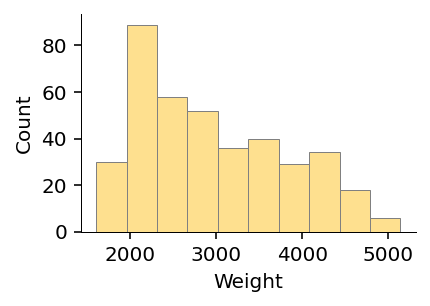

In [25]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
histo(ax, df_cars['WGT'])
ax.set_xlabel("Weight")
ax.set_ylabel("Count")
plt.show() # not needed actually as plot shows up by default in notebook

### Exercise 3

Repeat the same process for the `ENG` column to get a histogram.

## Series objects

Let's look in more detail at the `Series` objects that I think of as representing columns of dataframes, but are actually useful on their own. For example, I might simply have some timeseries data I want to store. A series object is a one-dimensional sequence of values, all with the same data type. For example, I could have a series of integers, strings, or floating-point numbers. Here's a numeric series:

In [26]:
a = pd.Series([10,2.4,81,1005]) # make a series with four numbers of type float
a

0      10.0
1       2.4
2      81.0
3    1005.0
dtype: float64

In [27]:
len(a), a.dtype

(4, dtype('float64'))

In [28]:
b = pd.Series(['Xue','Mary','Ollie'])
print("Type is", b.dtype)
b

Type is object


0      Xue
1     Mary
2    Ollie
dtype: object

There are lots of functions you can perform on series. For example, here are some operations for numerical columns:

In [29]:
a.min(), a.max(), a.mean(), a.sum(), a.count()

(2.4, 1005.0, 274.6, 1098.4, 4)

The string-related functions or available using the `str` member of the series:

In [30]:
b.str.lower()

0      xue
1     mary
2    ollie
dtype: object

In [31]:
b.str.extract("([a-z])") # get first letter using regular expression

,0
0,u
1,a
2,l


### Series indexes and indexing

Each series object has an associated index that sort of names the elements of the series, just as the index of the data frame identifies the rows of the data (see below).  The index values are commonly integers or strings. If we don't specifically specify an index, the index is just a series of consecutive integers starting from zero. That behaves then just like a list in Python when we use the `[...]` index operator.

We all understand the idea of a list of numbers in Python and we access the elements using the same syntax. The only difference is that the values inside the `[...]` can only be integers for Python lists. In pandas, the index type to use must be the same as the type of the index of the series.

This shows the standard index is simply the integer positions:

In [32]:
a.index

RangeIndex(start=0, stop=4, step=1)

But, we can create a series with, for example, an index whose members are strings:

In [33]:
b = pd.Series([10,2.4,81,1005], index=['t','u','v','w'])
b

t      10.0
u       2.4
v      81.0
w    1005.0
dtype: float64

In [34]:
b.index

Index(['t', 'u', 'v', 'w'], dtype='object')

In [35]:
a[2], a[3]

(81.0, 1005.0)

In [36]:
b['u'], b['w']

(2.4, 1005.0)

While convenient, this direct indexing makes it very easy to get confused if you are not very good with keeping types in your head or naming your variables with type information. It's better to use the more verbose but explicit `iloc` or `loc`:

In [37]:
a.iloc[2], a.loc[2], b.loc['u']

(81.0, 81.0, 2.4)

We use the same notation to set values:

In [38]:
a.iloc[2] = 9999
a

0      10.0
1       2.4
2    9999.0
3    1005.0
dtype: float64

In [39]:
b.loc['u'] = 9999
b

t      10.0
u    9999.0
v      81.0
w    1005.0
dtype: float64

### Selecting multiple values with indexing

We can even use **multiple values** when indexing:

In [40]:
b.loc[['u','w']]

u    9999.0
w    1005.0
dtype: float64

In [41]:
list(b.loc[['u','w']])  # get a simple Python list of values

[9999.0, 1005.0]

Note the ambiguity of the square brackets, which mean both index operator and list literal in Python: `[['u','w']]`.

### Pandas matches up series index values

The index of the series elements  makes column arithmetic (like `a+b`) a little more complex but much more sophisticated. For example, imagine that we have values associated with multiple states in the US, but where the values are not lined up according to state:

In [102]:
income = pd.Series([100,110,200,45], index=['WA','NV','CA','IA'])
taxes  = pd.Series([20,50,25,5], index=['IA','CA','NV','WA']) # diff order
print(income)
print(taxes)

WA    100
NV    110
CA    200
IA     45
dtype: int64
IA    20
CA    50
NV    25
WA     5
dtype: int64


In [103]:
income - taxes

CA    150
IA     25
NV     85
WA     95
dtype: int64

The key thing to notice here is that we don't have tax information for CA. When we add the two series together, pandas lines them up according to the index values so that things match up: WA to WA etc.

### Relational operators for series

To give you a taste of the power of pandas,  we can even use relational operators to select elements from a series. Here's how to get all values less than 100 from `a`:

In [42]:
a.loc[a<100]

0    10.0
1     2.4
dtype: float64

In [43]:
b.loc[b>100]

u    9999.0
w    1005.0
dtype: float64

Wow. How does that work? Relational operators like `a<100` give a series of Boolean values indicating where the expression is true.

In [44]:
a<100

0     True
1     True
2    False
3    False
dtype: bool

And, just like with other multiple index values, we can ask for the index of a list of Booleans (there must be a Boolean for each value in the series):

In [45]:
a.loc[[True,False,True,False]] # note the list within the index operators

0      10.0
2    9999.0
dtype: float64

###  Series look like dictionaries

You can think of a series as a dictionary where the index values map to values in the series. But, unlike dictionaries, Series index values do not have to be unique:

In [46]:
x = pd.Series([1,2,3], index=['u','u','t'])
x

u    1
u    2
t    3
dtype: int64

So, here's how to get all `u` members from series `x`.

In [47]:
x.loc['u']

u    1
u    2
dtype: int64

To avoid using the index and use simply the integer position of the series value, remember you can use `iloc`:

In [48]:
x.iloc[0]

1

### Arithmetic with series

As with numpy vectors, we can add series together and perform lots of other operations. Let's make some simple series of numbers and add them together:

In [49]:
a = pd.Series(range(5,10))
b = pd.Series(range(30,35))
print(a)
print(b)

0    5
1    6
2    7
3    8
4    9
dtype: int64
0    30
1    31
2    32
3    33
4    34
dtype: int64


In [50]:
a+b

0    35
1    37
2    39
3    41
4    43
dtype: int64

In [95]:
a.values # get numpy array underlying the series

array([5, 6, 7, 8, 9])

In [51]:
a.values + b.values  # using ".values" extract the underlying numpy array

array([35, 37, 39, 41, 43])

In [52]:
(a+b).values

array([35, 37, 39, 41, 43])

Keep in mind: Any arithmetic involving a nan, results in a nan.

We can also scale series very easily using arithmetic operators:

In [55]:
income*2

WA    200
NV    220
CA    400
IA     90
dtype: int64

###  Exercise 4

1. Make a `Series` object with year values: `1991,1992,1993,1994,1995,1996,1997,1998,1999,2000`.
1. Print out how many total values there are using code not manual counting
1. Print all values less than 1997
1. Make another series with rainfall values `12.09,12.35,12.51,10.25,10.18,10.59,10.26,10.48,8.67,10.23`
1. Print out the years for which rainfall was less than 11.
1. Scale that rainfall series by 20% and print it out

## Something's missing

Real-world data sets often have missing values. For example, if we are capturing ocean temperature with a series of devices bobbing in the ocean, some of them will be swallowed by sharks or be destroyed and we won't get any more data from them. Or,  if we are conducting a survey, some respondents will leave some entries blank. 

We need a way to represent missing data. A common way to do this is to choose a sentinel value like -1 or a string like 'n/a' or 'missing'. I've even seen data set where 1000 was used as the missing value indicator for year values. Pandas formalizes missing values by representing them as "not a number", a special floating-point value, `np.nan`, from numpy that indicates the value is invalid and should not be treated as valid.

In [104]:
c = pd.Series([10,20,np.nan,40])
c

0    10.0
1    20.0
2     NaN
3    40.0
dtype: float64

When doing EDA, it's very common to ask if there are missing values, which we can do with `isnull()`:

In [105]:
c.isnull() # return a Boolean indicating whether the series value is nan or correct

0    False
1    False
2     True
3    False
dtype: bool

**A subtle but important point here**: `np.nan` has type `float` and, since all values in a series must be the same type, a series of integer values with at least one missing value causes the entire series to be floating-point. But, non-numeric series stay as `object`.

In [58]:
d = pd.Series(['hi','mom',np.nan])
d

0     hi
1    mom
2    NaN
dtype: object

In [59]:
d.isnull()

0    False
1    False
2     True
dtype: bool

BTW, `isna()` is a synonym:

To get all of the non-missing data, we can use that function as an index value!

In [107]:
d.isna()

0    False
1    False
2     True
dtype: bool

In [60]:
c.loc[~c.isnull()]  # ~c.isnull() means "not null" or "not np.nan"

t    10.0
u    20.0
w    40.0
dtype: float64

In [61]:
d.loc[~d.isnull()]

0     hi
1    mom
dtype: object

If you ever want a version of a series with the NaNs replaced with a fill value, there is a handy function for you:

In [116]:
c.fillna(-1)

0    10.0
1    20.0
2    -1.0
3    40.0
dtype: float64

###  Functions do different things with missing values

To be very careful that you know how the various functions behave with respect to np.nan. Here are some samples:

In [108]:
c = pd.Series([10,20,np.nan,40])
c

0    10.0
1    20.0
2     NaN
3    40.0
dtype: float64

In [114]:
len(c), c.count(), c.sum(), c.sum(skipna=False), np.sum(c), sum(c)

(4, 3, 70.0, nan, 70.0, nan)

In [64]:
c * 3

t     30.0
u     60.0
v      NaN
w    120.0
dtype: float64

###  Exercise 5

1. Make a `Series` object with values: `1991,1992,1993,1994,1995,np.nan,1997,1998,1999,2000`.
1. Print out the non-NAN values
1. Set the NaN value to be 1996 and print the series out again
1. Verify that `count()` on that series does not include the NaN

## Data frames

A `DataFrame` object is a two-dimensional matrix with rows and columns just like a spreadsheet or database table.  Each column can have different data types, but all values within a column must be of the same data type; the columns behave like series objects.

Data frames columns are ordered and the name-to-column mapping is stored in an index.  Data frames also have an index for the rows, just like a series has an index into the values of the series. So, a data frame has two indexes which lets us zero in, for example, on a specific element using row and column index values.

Here is the car data again:

In [65]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


To extract a column, we have seen the `[...]` index operator, which gets a series object:

In [66]:
type(df_cars['MPG'])

pandas.core.series.Series

In [67]:
mpg = df_cars['MPG']
mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: MPG, Length: 392, dtype: float64

Once we have a series object, we can use the series index to get elements (repetition to improve your retention):

In [155]:
mpg.iloc[3], mpg.loc[3]   # the default index is just the integer position like iloc

(16.0, 16.0)

<img src="images/redbang.png" width="30" align="left">So, when you index into a data frame, you get a column. When you index into a series, you get an element. That's why I recommend that you use `.loc[...]` initially until you are good at keeping track of datatypes, such as series versus dataframes. It's a well-known confusion point for new students.

Let's look at the Uber data again and extract three columns. Please note the use of a list as an index value and the fact that we get a data frame back not a series because we asked for more than one column:

In [69]:
df_status = df_uber[['Date','Time','Status']]
print(type(df_status))
df_status.head(3)

<class 'pandas.core.frame.DataFrame'>


,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Cancelled
1,2014-07-01,2020-09-10 07:30:00,Arrived
2,2014-07-01,2020-09-10 08:00:00,Assigned


### Dataframe indexing

The columns form an index but there is also an index for the rows. The default index for the rows is just the integer position.

In [70]:
df_status.index

RangeIndex(start=0, stop=99, step=1)

To get a data frame row at a specific integer position as a Series, use `iloc`:

In [71]:
df_status.iloc[1]

Date      2014-07-01 00:00:00
Time      2020-09-10 07:30:00
Status                Arrived
Name: 1, dtype: object

In [72]:
df_status.iloc[2:4] # a slice of rows

,Date,Time,Status
2,2014-07-01,2020-09-10 08:00:00,Assigned
3,2014-07-01,2020-09-10 09:00:00,Assigned


In [145]:
df_status.iloc[:] # get all rows

,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Arrived
1,2014-07-01,2020-09-10 07:30:00,Arrived
2,2014-07-01,2020-09-10 08:00:00,Assigned
3,2014-07-01,2020-09-10 09:00:00,Assigned
4,2014-07-01,2020-09-10 09:30:00,Assigned
...,...,...,...
94,2014-07-21,2020-09-10 06:00:00,Assigned
95,2014-07-21,2020-09-10 08:30:00,Cancelled
96,2014-07-21,2020-09-10 12:00:00,Arrived
97,2014-07-21,2020-09-10 16:45:00,Assigned


In [157]:
df_status.iloc[0:len(df_status)] # SAME

,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Arrived
1,2014-07-01,2020-09-10 07:30:00,Arrived
2,2014-07-01,2020-09-10 08:00:00,Assigned
3,2014-07-01,2020-09-10 09:00:00,Assigned
4,2014-07-01,2020-09-10 09:30:00,Assigned
...,...,...,...
94,2014-07-21,2020-09-10 06:00:00,Assigned
95,2014-07-21,2020-09-10 08:30:00,Cancelled
96,2014-07-21,2020-09-10 12:00:00,Arrived
97,2014-07-21,2020-09-10 16:45:00,Assigned


In [149]:
df_status.iloc[:,1] # get all rows for column at position 1 as a Series

0    2020-09-10 07:15:00
1    2020-09-10 07:30:00
2    2020-09-10 08:00:00
3    2020-09-10 09:00:00
4    2020-09-10 09:30:00
             ...        
94   2020-09-10 06:00:00
95   2020-09-10 08:30:00
96   2020-09-10 12:00:00
97   2020-09-10 16:45:00
98   2020-09-10 13:30:00
Name: Time, Length: 99, dtype: datetime64[ns]

In [150]:
df_status.iloc[0:len(df_status),1] # SAME

0    2020-09-10 07:15:00
1    2020-09-10 07:30:00
2    2020-09-10 08:00:00
3    2020-09-10 09:00:00
4    2020-09-10 09:30:00
             ...        
94   2020-09-10 06:00:00
95   2020-09-10 08:30:00
96   2020-09-10 12:00:00
97   2020-09-10 16:45:00
98   2020-09-10 13:30:00
Name: Time, Length: 99, dtype: datetime64[ns]

**To access a row using the index**, instead of by position, use `loc`:

In [117]:
df_status.loc[1] # default index is the position

Date      2014-07-01 00:00:00
Time      2020-09-10 07:30:00
Status                Arrived
Name: 1, dtype: object

We can actually specify both a row and column using the `loc` operator:

In [74]:
df_status.loc[1,'Time'], df_status.loc[1,'Status']

(Timestamp('2020-09-10 07:30:00'), 'Arrived')

Another very useful operation is to set the index to one of the columns of the data frame:

In [75]:
df_status = df_status.set_index('Date')   # note that I reassign it to itself
df_status.head(5)

,Time,Status
Date,,
2014-07-01,2020-09-10 07:15:00,Cancelled
2014-07-01,2020-09-10 07:30:00,Arrived
2014-07-01,2020-09-10 08:00:00,Assigned
2014-07-01,2020-09-10 09:00:00,Assigned
2014-07-01,2020-09-10 09:30:00,Assigned


Then we can conveniently ask for all rows with a specific date using the index:

In [76]:
df_status.loc['07/03/2014'].head(3)

,Time,Status
Date,,
2014-07-03,2020-09-10 05:00:00,Arrived
2014-07-03,2020-09-10 05:45:00,Assigned
2014-07-03,2020-09-10 06:55:00,Arrived


We can reset the index as well to make the index become a column again:

In [77]:
df_status = df_status.reset_index()
df_status.head(3)

,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Cancelled
1,2014-07-01,2020-09-10 07:30:00,Arrived
2,2014-07-01,2020-09-10 08:00:00,Assigned


### Functions on columns

As we did in the section on series, we can apply functions to columns in a data frame. A very common task is to look at the unique values:

In [78]:
df_status['Status'].unique()

[Cancelled, Arrived, Assigned]
Categories (3, object): [Cancelled, Arrived, Assigned]

In [79]:
df_status['Date'].unique()

array(['2014-07-01T00:00:00.000000000', '2014-07-02T00:00:00.000000000',
       '2014-07-03T00:00:00.000000000', '2014-07-04T00:00:00.000000000',
       '2014-07-05T00:00:00.000000000', '2014-07-06T00:00:00.000000000',
       '2014-07-07T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-11T00:00:00.000000000', '2014-07-12T00:00:00.000000000',
       '2014-07-13T00:00:00.000000000', '2014-07-14T00:00:00.000000000',
       '2014-07-15T00:00:00.000000000', '2014-07-16T00:00:00.000000000',
       '2014-07-17T00:00:00.000000000', '2014-07-18T00:00:00.000000000',
       '2014-07-19T00:00:00.000000000', '2014-07-20T00:00:00.000000000',
       '2014-07-21T00:00:00.000000000', '2014-07-22T00:00:00.000000000'],
      dtype='datetime64[ns]')

Aside from computing the unique values, we can also ask for the count for each unique value:

In [118]:
df_status['Status'].value_counts() # like a histogram

Arrived      59
Assigned     32
Cancelled     8
Name: Status, dtype: int64

Because the columns are retrieved as series objects, we can do the same column arithmetic:

In [152]:
df_cars['MPG']/df_cars['WGT']

0      0.005137
1      0.004062
2      0.005239
3      0.004661
4      0.004929
         ...   
387    0.009677
388    0.020657
389    0.013943
390    0.010667
391    0.011397
Length: 392, dtype: float64

### Missing values in a data frame

Returning to our friend the missing value, we can ask for a matrix of Boolean values indicating whether a specific row and column value is missing:

In [81]:
df_status.isnull().head(5)   # notice I am chaining the functions here isnull->head

,Date,Time,Status
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [82]:
df_status.isnull().sum()  # how many in each column are missing? it turns out none are missing:

Date      0
Time      0
Status    0
dtype: int64

By default, the summation occurs down the rows, which pandas indicates with a default of `axis=0`:

In [122]:
df_status.isnull().sum(axis=0)

Date      0
Time      0
Status    0
dtype: int64

We can sum down the columsn with `axis=1`:

In [123]:
df_status.isnull().sum(axis=1)  # how many in each row are missing?

0     0
1     0
2     0
3     0
4     0
     ..
94    0
95    0
96    0
97    0
98    0
Length: 99, dtype: int64

In [124]:
df_status.isnull().any() # don't care about the count, just absence of values

Date      False
Time      False
Status    False
dtype: bool

In [125]:
df_status.isnull().any().any()

False

### Altering data frames

We often want to alter the values in a data frame, such as when we clean up data in preparation for modeling. We can set individual values, rows, or entire columns.

In [126]:
df_status['junk'] = 0      # insert a new column and set to 0
df_status.head(3)

,Date,Time,Status,junk
0,2014-07-01,2020-09-10 07:15:00,Arrived,0
1,2014-07-01,2020-09-10 07:30:00,Arrived,0
2,2014-07-01,2020-09-10 08:00:00,Assigned,0


In [127]:
df_status['junk'] = 99     # overwrite a column with a single value
df_status.head(3)

,Date,Time,Status,junk
0,2014-07-01,2020-09-10 07:15:00,Arrived,99
1,2014-07-01,2020-09-10 07:30:00,Arrived,99
2,2014-07-01,2020-09-10 08:00:00,Assigned,99


In [128]:
df_status['junk'] = range(100,199)  # set a column to a new series of data
df_status.head(3)

,Date,Time,Status,junk
0,2014-07-01,2020-09-10 07:15:00,Arrived,100
1,2014-07-01,2020-09-10 07:30:00,Arrived,101
2,2014-07-01,2020-09-10 08:00:00,Assigned,102


In [129]:
df_status = df_status.drop('junk', axis=1)    # axis=1 means drop a column
df_status.head(3)

,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Arrived
1,2014-07-01,2020-09-10 07:30:00,Arrived
2,2014-07-01,2020-09-10 08:00:00,Assigned


Or you can use `del df_status['junk']` which might be a bit more obvious.

In [130]:
df_status.loc[0,'Status'] = 'Arrived'     # Update a single categorical value in one column
df_status.head(3)

,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Arrived
1,2014-07-01,2020-09-10 07:30:00,Arrived
2,2014-07-01,2020-09-10 08:00:00,Assigned


**WARNING**: Injecting a new column into, say, `df_status` is no problem as long as the data frame referred to is the entire data frame, and not a subset (sometimes called a view).  For example, the following gets an error because I'm updating a "slice" of the original data frame.

In [90]:
df_x = df_status.iloc[5:10]
df_x['foo'] = 0

<ipython-input-90-68d97c138c04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['foo'] = 0


My usual solution is simply to make a copy so I get a copy and not a subset view of the original data frame:

In [91]:
df_x = df_status.iloc[5:10].copy()
df_x['foo'] = 0
df_x.head(2)

,Date,Time,Status,foo
5,2014-07-01,2020-09-10 12:00:00,Arrived,0
6,2014-07-01,2020-09-10 12:30:00,Assigned,0


In [92]:
df_status.head(2)   # original does not have the 'foo' column

,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Arrived
1,2014-07-01,2020-09-10 07:30:00,Arrived


Most of the time we are not deleting rows but we can do so using use `drop`.  Most likely we are asking for a subset of the data.  For example, here is how to find all trips that arrived:

In [93]:
df_status[df_status['Status']=='Arrived'].head(3)

,Date,Time,Status
0,2014-07-01,2020-09-10 07:15:00,Arrived
1,2014-07-01,2020-09-10 07:30:00,Arrived
5,2014-07-01,2020-09-10 12:00:00,Arrived


### Exercise 6

For the cars data set:

1. Use numpy's function `np.corrcoef(x,y)` to compute the correlation between a car's weight and the miles per gallon; that function returns a matrix of x with x, x with y, etc... so the diagonal will always be correlation 1.0.  You should see a strongly negative correlation
1. Display the records for all 8 cylinder cars
1. Create a new column called `ENG2WGT` that has the engine to weight ratio

From the `df_uber` data frame:

1.  Create a new data frame containing `Time`, `Status`, and `PU_Address` columns
1.  Set the index of that data frame to `Time`
1.  Display records at positions between 10 and 15 inclusively
1.  Display the `PU_Address` for records whose index is `'2020-09-10 07:30:00'`
1.  Reset the data frame so that `Time` is a column again.
1.  Create a new column called `year` that has the year extracted from the `Time` column using `.dt.year`

### Exercise 7

Make a list of all of the key operations we performed in this notebook. For example, you can give an example of each and then a brief description. The goal here is to get these commands into your brain and the only way to do that is repetition. If you cut-and-paste, you will not learn very quickly at all!